***`Universidad de Sonora, Campus Hermosillo`***

---

***`Profesor: `*** *`Lizarraga Celaya Carlos`*

***`Materia: `*** *`Física Computacional`*

---

***`Trabajo: `*** *`Actividad 9`*

---

***`Alumno: `*** *`Bonillas Miranda Akin`*

***`Número de Expediente: `*** *`219211360`*

***`Correo: `*** *`a219211360@unison.mx // akinbonillasmiranda@gmail.com`*

***`Número Telefónico: `*** *`662 368 2474`*

---

***`Grupo: `*** *`2`*

***`Carrera: `*** *`Licenciatura en Física`*

***`Semestre: `*** *`Cuarto Semestre`*

---

***`Viernes 19 de Marzo de 2021, Hermosillo, Sonora`***

.

# ***`Ejercicios 1:`***

In [19]:
#============================ IMPORTAMOS BIBLIOTECAS ===========================

import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd

*`Por favor grafique en el espacio fase una familia de soluciones y determine el tipo de punto crítico de cada uno de los siguientes sistemas de ecuaciones.`*

\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = & -x   \\
\end{eqnarray*}


*`Reescribimos el sistema de ecuaciones diferenciales de la siguiente manera:`*

\begin{eqnarray*}
  \frac{d x}{d t} & = &  0(x) + 1(y)  \\
  \frac{d y}{dt } & = & -1(x) + 0(y)   \\
\end{eqnarray*}

*`Y el vector de variables lo definimos cómo:`*

\begin{equation*}
  \vec{x} = 
  \begin{bmatrix}
    x \\
    y \\
  \end{bmatrix}
\end{equation*}

*`Por lo que podemos reescribir el sistema de ecuaciones diferenciales cómo:`*

\begin{equation}
  \frac{d}{dt} 
  \begin{bmatrix}
    x \\
    y \\
  \end{bmatrix} = 
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    0(x) + 1(y)\\
    -1(x) + 0(y) \\
  \end{bmatrix}
\end{equation}

*`Por lo tanto tenemos que:`*

\begin{equation}
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
     0 & 1 \\
    -1 & 0 \\
  \end{bmatrix} *
  \begin{bmatrix}
    x \\
    y \\
  \end{bmatrix}, A = 
  \begin{bmatrix}
     0 & 1 \\
    -1 & 0 \\
  \end{bmatrix}
\end{equation}

In [ ]:
#======================= CALCULAMOS LOS VALORES DE LAMBDA ======================

print( "-------------------- Valores de la Matrz: --------------------" ) 
print( " " )

A = np.array( [ [ 0, 1 ], [ -1, 0 ] ] )
print( A, " = A" )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = p = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = q = ", q, " : Determinante de la Matriz" )
print( " " )

print( "-------------------- Las Raíces son: --------------------" )
print( " " )

# p( λ ) = λ^2 - pλ + q # Polinomio característico de det( A - λI )

dis = p**2 - 4*q

if ( dis < 0 ):

  absdis = abs ( dis ) # Convertimos en valor absoluta para que sea calculable

  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  

  print( " λ1 = ", λ1, "i" ) # Raíces Imaginarias
  print( " λ2 = ", λ2, "i" )

else:

  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 

  print( " λ1 = ", λ1 ) # Raíces Reales
  print( " λ2 = ", λ2 )

-------------------- Valores de la Matrz: --------------------
 
[[ 0  1]
 [-1  0]]  = A
 
Tr(A) = p =  0  : Traza de la Matriz
 
det(A) = q =  1.0  : Determinante de la Matriz
 
-------------------- Las Raíces son: --------------------
 
 λ1 =  1.0 i
 λ2 =  -1.0 i


*`De lo anterior concluimos que la matriz A pertenece al caso C)`*

\begin{equation*}
 \begin{bmatrix}
a & -b \\
b & a
\end{bmatrix}, b \neq 0
\end{equation*}


*`visto en clase, y dadas las entradas en la matriz podemos saber que su la solución es estable y sin decaer o crecer (Centro: a=0, b>0)`*

*`La solución del sistema de ecuaciones diferenciales en este caso corresponde la siguiente expresión:`*

\begin{eqnarray*}
x(t) & = & [c_1 (\cos(bt) + i \sin(bt)) \ v_1 +
c_2 (\cos(bt) - i \sin(bt)) \ v_2 ] \exp(at) \\
\end{eqnarray*}

*`Sin embargo, ya que $a=0$, el factor $exp(at)$ es igual a 1, por lo que tenemos que:`*

\begin{eqnarray*}
x(t) & = & c_1 (\cos(bt) + i \sin(bt)) \ v_1 +
c_2 (\cos(bt) - i \sin(bt)) \ v_2  \\
\end{eqnarray*}

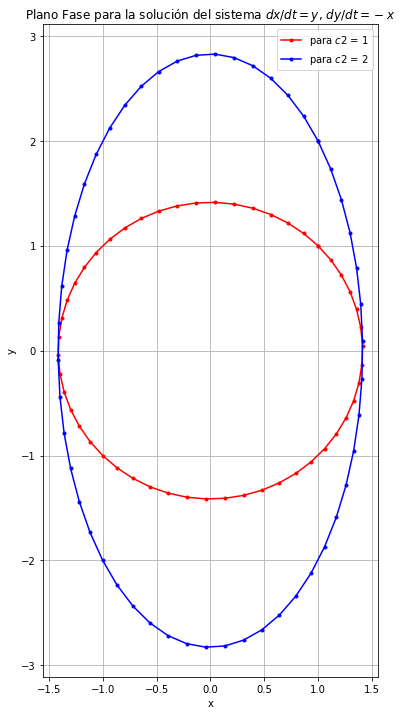

In [ ]:
#===================== SOLUCIÓN DE LA ECUACIÓN DIFERENCIAL =====================
 
# Definimos las condiciones 
 
π = np.pi
 
t = np.linspace( 0, 2*π, 51 )
 
c1 = 1
c2 = 1
c3 = 2
 
a = 0
b = 1
 
v1 = np.array( [ [ 1 ], [ 0 ] ] ) # Definimos la base canónica
# print( v1, " = v1 " )           # de los imaginarios
v2 = np.array( [ [ 0 ], [ 1 ] ] )
# print( v2, " = v2 " )

# Función para calcular la solución
 
def x( t, a, b, c1, c2, v1, v2 ):
  w1 = c1*( np.cos( b*t ) + np.sin( b*t ) )*v1 # Primer término de la solución
  w2 = c2*( np.cos( b*t ) - np.sin( b*t ) )*v2 # Segundo término de la solución
  c = np.exp( a*t ) # Factor de la solución
 
  return ( w1 + w2 )*c
 
Sol1 = x( t, a, b, c1, c2, v1, v2 ) # Solución para c1 = 1 y c2 = 1
    # print( Sol )
 
xx1 = Sol1[ 0, : ]
    # print( xx )
xy1 = Sol1[ 1, : ]
    # print( xy )
 
Sol2 = x( t, a, b, c1, c3, v1, v2 ) # Solución para c1 = 1 y c2 = 2
    # print( Sol )
 
xx2 = Sol2[ 0, : ]
    # print( xx )
xy2 = Sol2[ 1, : ]
    # print( xy )
 
plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx1, xy1, "r.-", label = "para $c2$ = 1" )
plt.plot( xx2, xy2, "b.-", label = "para $c2$ = 2" )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del sistema $dx/dt = y$, $dy/dt = -x$" )
plt.xlabel( "x" )
plt.ylabel( "y" )
 
plt.grid()
plt.show()

# ***`Ejercicio 2:`***

*`Por favor grafique en el espacio fase una familia de soluciones y determine el tipo de punto crítico de cada uno de los siguientes sistemas de ecuaciones.`*

\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = &  x  \\
\end{eqnarray*}

*`Reescribimos el sistema de ecuaciones diferenciales de la siguiente manera:`*

\begin{eqnarray*}
  \frac{d x}{d t} & = & 1(y) + 0(x)  \\
  \frac{d y}{dt } & = & 0(y) + 1(x)   \\
\end{eqnarray*}

*`Y el vector de variables lo definimos cómo:`*

\begin{equation*}
  \vec{x} = 
  \begin{bmatrix}
    x \\
    y \\
  \end{bmatrix}
\end{equation*}

*`Por lo que podemos reescribir el sistema de ecuaciones diferenciales cómo:`*

\begin{equation}
  \frac{d}{dt} 
  \begin{bmatrix}
    x \\
    y \\
  \end{bmatrix} = 
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    1(y) + 0(x)\\
    0(y) + 1(x) \\
  \end{bmatrix}
\end{equation}

*`Por lo tanto tenemos que:`*

\begin{equation}
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
  \end{bmatrix} *
  \begin{bmatrix}
    y \\
    x \\
  \end{bmatrix}, A = 
  \begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
  \end{bmatrix}
\end{equation}

In [ ]:
#======================= CALCULAMOS LOS VALORES DE LAMBDA ======================

print( "-------------------- Valores de la Matrz: --------------------" ) 
print( " " )

A = np.array( [ [ 1, 0 ], [ 0, 1 ] ] )
print( A, " = A" )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = p = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = q = ", q, " : Determinante de la Matriz" )
print( " " )

print( "-------------------- Las Raíces son: --------------------" )
print( " " )

# p( λ ) = λ^2 - pλ + q # Polinomio característico de det( A - λI )

dis = p**2 - 4*q

if ( dis < 0 ):

  absdis = abs ( dis ) # Convertimos en valor absoluta para que sea calculable

  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  

  print( " λ1 = ", λ1, "i" ) # Raíces Imaginarias
  print( " λ2 = ", λ2, "i" )

else:

  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 

  print( " λ1 = ", λ1 ) # Raíces Reales
  print( " λ2 = ", λ2 )

-------------------- Valores de la Matrz: --------------------
 
[[1 0]
 [0 1]]  = A
 
Tr(A) = p =  2  : Traza de la Matriz
 
det(A) = q =  1.0  : Determinante de la Matriz
 
-------------------- Las Raíces son: --------------------
 
 λ1 =  1.0
 λ2 =  1.0


*`De lo anterior concluimos que la matriz A pertenece al caso A)`*

\begin{equation*}
 \begin{bmatrix}
    \lambda & 0 \\
    0 & \mu
  \end{bmatrix}
\end{equation*}


*`visto en clase, y dadas las entradas en la matriz podemos saber que su la solución es un Nodo inestable: 0 < λ = μ `*

*`La solución del sistema de ecuaciones diferenciales en este caso corresponde la siguiente expresión:`*

\begin{equation*}
x(t) = c_1 \exp(\lambda t) \ {v_1} + c_2 \exp(\mu t) \ {v_2}
\end{equation*}

*`donde`* ${v_1}$ y ${v_2}$ *`son los eigenvectores correspondentes a los eigenvalores λ y μ respectivamente`* $c_1$ *`y`* $c_2$ *`constantes.`*

-------------------- Eigenvalores y Eigenvectores --------------------
 
Eigenvalores de A :  [1.+0.j 1.+0.j]
 
[[1. 0.]
 [0. 1.]]  : Eigenvectores de A
 
[[1]
 [0]]  = v1 
 
[[0]
 [1]]  = v2 
 


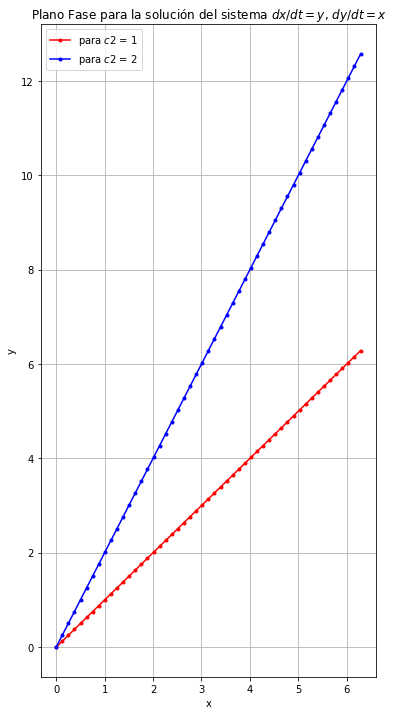

In [ ]:
#======================= CALCULAMOS LOS VALORES DE LAMBDA ======================

# Condiciones del problema

π = np.pi

t = np.linspace( 0, 2*π, 51 )

λ = 1
μ = 1

c1 = 1
c2 = 1
c3 = 2

print( "-------------------- Eigenvalores y Eigenvectores --------------------" )
print( " " )

eigvals, eigvecs = la.eig( A ) # Calculamos los eigenvalores y eigenvectores

print( "Eigenvalores de A : ", eigvals )
print( " " )
print( eigvecs, " : Eigenvectores de A" )
print( " " )

eigv1 = ( eigvecs[:,0] ) # ( [ 1 ], [ 0 ] )
v1 = np.array( [ [ 1 ], [ 0 ] ] ) # Eigenvector 1
print( v1, " = v1 " ), print( " " )

eigv2 = ( eigvecs[:,1] ) # ( [ 0 ], [ 1 ] )
v2 = np.array( [ [ 0 ], [ 1 ] ] ) # Eigenvector 2
print( v2, " = v2 " ), print( " " )

# Función para calcular la solución

def x( t, λ, μ, c1, c2, v1, v2 ):
  w1 = c1*( t**λ )*v1
  w2 = c2*( t**μ )*v2
  
  return w1 + w2

Sol1 = x( t, λ, μ, c1, c2, v1, v2 ) # Solución para c1 = 1 y c2 = 1
    # print( Sol )

xx1 = Sol1[ 0, : ]
    # print( xx1 )
xy1 = Sol1[ 1, : ]
    # print( xy1 )

Sol2 = x( t, λ, μ, c1, c3, v1, v2 ) # Solución para c1 = 1 y c2 = 1
    # print( Sol )

xx2 = Sol2[ 0, : ]
    # print( xx2 )
xy2 = Sol2[ 1, : ]
    # print( xy2 )

plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx1, xy1, "r.-", label = "para $c2$ = 1" )
plt.plot( xx2, xy2, "b.-", label = "para $c2$ = 2" )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del sistema $dx/dt = y$, $dy/dt = x$" )
plt.xlabel( "x" )
plt.ylabel( "y" )

plt.grid()
plt.show()

# ***`Ejercicio 3:`***

*`Por favor grafique en el espacio fase una familia de soluciones y determine el tipo de punto crítico de cada uno de los siguientes sistemas de ecuaciones.`*

\begin{eqnarray*}
\frac{d^2 x}{d t^2} + \omega_0^2 x & = & 0, \ \omega_0 > 0  \\
\end{eqnarray*}

*`Despejamos el difernecial de la ecuación anterior, y definimos una nueva ecuación diferencial:`*

\begin{eqnarray*}
\frac{d^2 x}{d t^2} = & - \omega_0^2 x & 0, \ \omega_0 > 0,
\frac{dx}{dt} = v
\end{eqnarray*}

*`por lo tanto obtenemos el siguiente sistema de ecuaciones diferenciales:`*

\begin{eqnarray}
\frac{dv}{dt} = - \omega_0^2 x & , \ \omega_0 > 0 \\
\frac{dx}{dt} = v \\
\end{eqnarray}

*`Reescribimos las ecuaciones anteriores como:`*

\begin{eqnarray}
\frac{dv}{dt} = - \omega_0^2 x + 0(v) &, \ \omega_0 > 0 \\
\frac{dx}{dt} = 0(x) + 1(v)\\
\end{eqnarray}

*`Y el vector de variables lo definimos cómo:`*

\begin{equation*}
  \vec{x} = 
  \begin{bmatrix}
    v \\
    x \\
  \end{bmatrix}
\end{equation*}

*`Por lo que podemos reescribir el sistema de ecuaciones diferenciales cómo:`*

\begin{equation}
  \frac{d}{dt} 
  \begin{bmatrix}
    v \\
    x \\
  \end{bmatrix} = 
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    - \omega_0^2 x + 0(v) \\
    0(x) + 1(v) \\
  \end{bmatrix}
\end{equation}

*`Por lo tanto tenemos que:`*

\begin{equation}
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    - \omega_0^{2} & 0 \\
    0 & 1 \\
  \end{bmatrix} *
  \begin{bmatrix}
    y \\
    x \\
  \end{bmatrix}, A = 
  \begin{bmatrix}
    - \omega_0^{2} & 0 \\
    0 & 1 \\
  \end{bmatrix}
\end{equation}


In [ ]:
#======================= CALCULAMOS LOS VALORES DE LAMBDA ======================

print( "-------------------- Valores de la Matrz: --------------------" ) 
print( " " )

ω0 = 1

A = np.array( [ [ - ω0**2 , 0 ], [ 0, 1 ] ] )
print( A, " = A" )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = p = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = q = ", q, " : Determinante de la Matriz" )
print( " " )

print( "-------------------- Las Raíces son: --------------------" )
print( " " )

# p( λ ) = λ^2 - pλ + q # Polinomio característico de det( A - λI )

dis = p**2 - 4*q

if ( dis < 0 ):

  absdis = abs ( dis ) # Convertimos en valor absoluta para que sea calculable

  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  

  print( " λ1 = ", λ1, "i" ) # Raíces Imaginarias
  print( " λ2 = ", λ2, "i" )

else:

  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 

  print( " λ1 = ", λ1 ) # Raíces Reales
  print( " λ2 = ", λ2 )

-------------------- Valores de la Matrz: --------------------
 
[[-1  0]
 [ 0  1]]  = A
 
Tr(A) = p =  0  : Traza de la Matriz
 
det(A) = q =  -1.0  : Determinante de la Matriz
 
-------------------- Las Raíces son: --------------------
 
 λ1 =  1.0
 λ2 =  -1.0


*`De lo anterior concluimos que la matriz A pertenece al caso A)`*

\begin{equation*}
 \begin{bmatrix}
    \lambda & 0 \\
    0 & \mu
  \end{bmatrix}
\end{equation*}


*`visto en clase, y dadas las entradas en la matriz podemos saber que su la solución es un Punto Silla: λ < 0 < μ `*

*`La solución del sistema de ecuaciones diferenciales en este caso corresponde la siguiente expresión:`*

\begin{equation*}
x(t) = c_1 \exp(\lambda t) \ {v_1} + c_2 \exp(\mu t) \ {v_2}
\end{equation*}

*`donde`* ${v_1}$ y ${v_2}$ *`son los eigenvectores correspondentes a los eigenvalores λ y μ respectivamente`* $c_1$ *`y`* $c_2$ *`constantes.`*

-------------------- Eigenvalores y Eigenvectores --------------------
 
Eigenvalores de A :  [-1.+0.j  1.+0.j]
 
[[1. 0.]
 [0. 1.]]  : Eigenvectores de A
 
[[1]
 [0]]  = v1 
 
[[0]
 [1]]  = v2 
 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in multiply


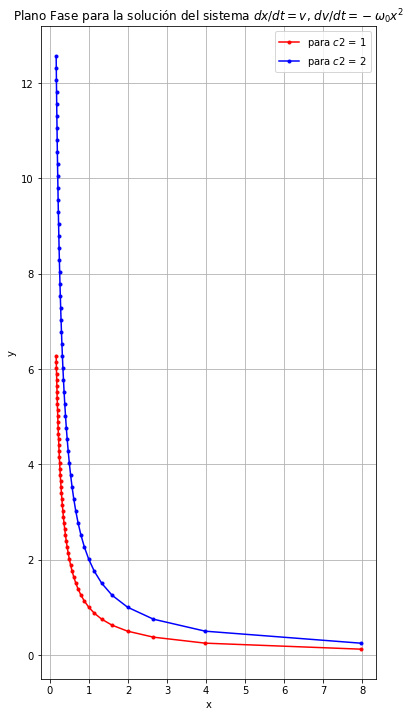

In [ ]:
#======================= CALCULAMOS LOS VALORES DE LAMBDA ======================

# Condiciones del problema

π = np.pi

t = np.linspace( 0, 2*π, 51 )

λ = - ω0**2
μ = 1

c1 = 1
c2 = 1
c3 = 2

print( "-------------------- Eigenvalores y Eigenvectores --------------------" )
print( " " )

eigvals, eigvecs = la.eig( A ) # Calculamos los eigenvalores y eigenvectores

print( "Eigenvalores de A : ", eigvals )
print( " " )
print( eigvecs, " : Eigenvectores de A" )
print( " " )

eigv1 = ( eigvecs[:,0] ) # ( [ 1 ], [ 0 ] )
v1 = np.array( [ [ 1 ], [ 0 ] ] ) # Eigenvector 1
print( v1, " = v1 " ), print( " " )

eigv2 = ( eigvecs[:,1] ) # ( [ 0 ], [ 1 ] )
v2 = np.array( [ [ 0 ], [ 1 ] ] ) # Eigenvector 2
print( v2, " = v2 " )
print( " " )

# Función para calcular la solución

def x( t, λ, μ, c1, c2, v1, v2 ):
  w1 = c1*( t**λ )*v1
  w2 = c2*( t**μ )*v2
  
  return w1 + w2

Sol1 = x( t, λ, μ, c1, c2, v1, v2 ) # Solución para c1 = 1 y c2 = 1
    # print( Sol )

xx1 = Sol1[ 0, : ]
    # print( xx1 )
xy1 = Sol1[ 1, : ]
    # print( xy1 )

Sol2 = x( t, λ, μ, c1, c3, v1, v2 ) # Solución para c1 = 1 y c2 = 1
    # print( Sol )

xx2 = Sol2[ 0, : ]
    # print( xx2 )
xy2 = Sol2[ 1, : ]
    # print( xy2 )

plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx1, xy1, "r.-", label = "para $c2$ = 1" )
plt.plot( xx2, xy2, "b.-", label = "para $c2$ = 2" )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del sistema $dx/dt = v$, $dv/dt = - \omega_0x^{2}$" )
plt.xlabel( "x" )
plt.ylabel( "y" )

plt.grid()
plt.show()

# ***`Ejercicio 4: `***

*`Por favor grafique en el espacio fase una familia de soluciones y determine el tipo de punto crítico de cada uno de los siguientes sistemas de ecuaciones.`*


\begin{eqnarray*}
\frac{d x}{d t} & = & -2 x  \\
\frac{d y}{dt } & = &  2 z  \\
\frac{d z}{dt } & = &  - 2 y  \\
\end{eqnarray*}

*`Reescribimos el sistema de ecuaciones diferenciales de la siguiente manera:`*

\begin{eqnarray*}
\frac{d x}{d t} & = & -2(x) + 0(y) + 0(z) \\
\frac{d y}{dt } & = &  0(x) + 0(y) + 2(z) \\
\frac{d z}{dt } & = &  0(x) - 2(y) + 0(z) \\
\end{eqnarray*}

*`Definimos ahora el vector de variables de la siguiente manera:`*

\begin{equation*}
  \vec{x} = 
  \begin{bmatrix}
    x \\
    y \\
    z \\
  \end{bmatrix}
\end{equation*}

*`escribimos el sistema de ecuaciones diferenciales de forma vectorial/matricial:`*

\begin{equation}
  \frac{d}{dt} 
  \begin{bmatrix}
    x \\
    y \\
    z \\
  \end{bmatrix} = 
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    -2(x) + 0(y) + 0(z) \\
    0(x) + 0(y) + 2(z) \\
    0(x) - 2(y) + 0(z)
  \end{bmatrix}
\end{equation}

*`Por lo tanto tenemos que:`*

\begin{equation}
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    -2 & 0 & 0 \\
     0 & 0 & 2 \\
    0 & -2 & 0 \\
  \end{bmatrix} *
  \begin{bmatrix}
    x \\
    y \\
    z \\
  \end{bmatrix}, A = 
  \begin{bmatrix}
    -2 & 0 & 0 \\
     0 & 0 & 2 \\
    0 & -2 & 0 \\
  \end{bmatrix}
\end{equation}

In [ ]:
#======================= CALCULAMOS LOS VALORES DE LAMBDA ======================

print( "-------------------- Matriz A --------------------" )
print( " " )

A = np.array( [ [ -2, 0, 0 ], [ 0, 0, 2 ], [ 0, -2, 0 ] ] )
print( A, " = A " )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = ", q, " : Determinante de la Matriz" )
print( " " )

eigvals, eigvecs = la.eig( A )
print( eigvals, " : Eigenvalores " )
print( " " )
print( eigvecs, " : Eigenvectores " )
print( " " )

Λ = np.array( [ [ complex( 0, 2 ), 0, 0 ], 
                [ 0, complex( 0, -2 ), 0 ], 
                [ 0, 0, -2 ] ] )

print( Λ, " = Λ " )
print( " " )

eigvec = np.array( [ [ 0, 0, 1 ],  
                     [ - np.sqrt( 2 )/2 , - np.sqrt( 2 )/2, 0 ], 
                     [ complex( 0, - np.sqrt( 2 )/2 ), complex( 0, np.sqrt( 2 )/2 ), 0 ] ] )
print( eigvec, " = P " )
print( " " )

print( la.inv( eigvec), " = P^-1 " )
print( " " )

prod = eigvec @ Λ @ la.inv ( eigvec ) 

print( prod )

-------------------- Matriz A --------------------
 
[[-2  0  0]
 [ 0  0  2]
 [ 0 -2  0]]  = A 
 
Tr(A) =  -2  : Traza de la Matriz
 
det(A) =  -8.0  : Determinante de la Matriz
 
[ 0.+2.j  0.-2.j -2.+0.j]  : Eigenvalores 
 
[[ 0.        +0.j          0.        -0.j          1.        +0.j        ]
 [-0.70710678+0.j         -0.70710678-0.j          0.        +0.j        ]
 [ 0.        -0.70710678j  0.        +0.70710678j  0.        +0.j        ]]  : Eigenvectores 
 
[[ 0.+2.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.-2.j  0.+0.j]
 [ 0.+0.j  0.+0.j -2.+0.j]]  = Λ 
 
[[ 0.        +0.j          0.        +0.j          1.        +0.j        ]
 [-0.70710678+0.j         -0.70710678+0.j          0.        +0.j        ]
 [ 0.        -0.70710678j  0.        +0.70710678j  0.        +0.j        ]]  = P 
 
[[-0.        -0.j         -0.70710678+0.j          0.        +0.70710678j]
 [-0.        -0.j         -0.70710678+0.j          0.        -0.70710678j]
 [ 1.        -0.j          0.        +0.j          0.  

In [ ]:
print( "-------------------- Según una calculadora externa --------------------" )
print( " " )

eigvals = np.array( [ -2, complex( 0, 2 ), complex( 0, -2 ) ] )
print( " Eigenvalores : ", eigvals )
print( " " )

Λ = np.array( [ [ -2, 0, 0 ], 
                [ 0, complex( 0, 2 ), 0 ], 
                [ 0, 0, complex( 0, -2 ) ] ] )

print( Λ, " = Λ " )
print( " " )

eig1 = np.array( [ [ 1 ], [ 0 ], [ 0 ] ] )
eig2 = np.array( [ [ 0 ], [ complex( 0, -1 ) ], [ 1 ] ] )
eig3 = np.array( [ [ 0 ], [ complex( 0, 1 ) ], [ 1 ] ] )
print( eig1, " = v1 " )
print( " " )
print( eig2, " = v2 " )
print( " " )
print( eig3, " = v3 " )
print( " " )

eigvec = np.array( [ [ 1, 0, 0 ],  
                     [ 0, complex( 0, -1), complex( 0, 1 ) ], 
                     [ 0, 1, 1 ] ] )

print( eigvec, " = P " )
print( " " )

print( la.inv( eigvec ), " = P^-1 " )
print( " " )

prod = eigvec @ Λ @ la.inv ( eigvec ) 

print( prod, " = A " )

-------------------- Según una calculadora externa --------------------
 
 Eigenvalores :  [-2.+0.j  0.+2.j  0.-2.j]
 
[[-2.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+2.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.-2.j]]  = Λ 
 
[[1]
 [0]
 [0]]  = v1 
 
[[0.+0.j]
 [0.-1.j]
 [1.+0.j]]  = v2 
 
[[0.+0.j]
 [0.+1.j]
 [1.+0.j]]  = v3 
 
[[1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+1.j]
 [0.+0.j 1.+0.j 1.+0.j]]  = P 
 
[[ 1. -0.j   0. -0.j  -0. -0.j ]
 [ 0. +0.j   0. +0.5j  0.5-0.j ]
 [ 0. +0.j   0. -0.5j  0.5-0.j ]]  = P^-1 
 
[[-2.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  2.+0.j]
 [ 0.+0.j -2.+0.j  0.+0.j]]  = A 


*`Podemos ver que en los dos casos se cumple que:`*

\begin{equation}
  A=P^{-1} \Lambda P
\end{equation}

*`ó en este caso:`*

\begin{equation}
  A=P \Lambda P^{-1}
\end{equation}

*`pero por simplicidad en los cálculos utilizaremos el segundo de los casos, el cual fue determinado con una calculadora externa.`*

*`De la última expresión, y conjuntamente con la solución, obtenemos que:`*

\begin{equation*}
  \vec{x}(t) = \vec{x_0} \exp{(At)}
\end{equation*}

\begin{equation*}
  \vec{x}(t) = \vec{x_0} \exp{(P \Lambda P^{-1}t)}
\end{equation*}

\begin{equation*}
  \vec{x}(t) = \vec{x_0} P\exp{( \Lambda t)}P^{-1}
\end{equation*}

\begin{equation*}
  \vec{x}(t) = \vec{x_0} 
  \begin{bmatrix}
    1 &  0 & 0 \\
    0 & -i & i \\
    0 &  1 & 1 \\
  \end{bmatrix}
  \exp{ \left( \begin{bmatrix}
    -2 &  0 &   0 \\
    0 & 2i &   0 \\
    0 &  0 & -2i \\
  \end{bmatrix} t \right)} 
  \begin{bmatrix}
    1 &    0 & 0 \\
    0 &  i/2 & 1/2 \\
    0 & -i/2 & 1/2 \\
  \end{bmatrix}
\end{equation*}

\begin{equation*}
  \vec{x}(t) = \vec{x_0} 
  \begin{bmatrix}
    1 &  0 & 0 \\
    0 & -i & i \\
    0 &  1 & 1 \\
  \end{bmatrix}
  \begin{bmatrix}
    e^{-2t} &       0 &        0 \\
          0 & e^{2it} &        0 \\
          0 &       0 & e^{-2it} \\
  \end{bmatrix}
  \begin{bmatrix}
    1 &    0 & 0 \\
    0 &  i/2 & 1/2 \\
    0 & -i/2 & 1/2 \\
  \end{bmatrix}
\end{equation*}

\begin{equation*}
  \vec{x}(t) = \vec{x_0} 
  \begin{bmatrix}
    e^{-2t} &         0 &        0 \\
          0 & -ie^{2it} &        0 \\
          0 &         0 & e^{-2it} \\
  \end{bmatrix}
  \begin{bmatrix}
    1 &    0 & 0 \\
    0 &  i/2 & 1/2 \\
    0 & -i/2 & 1/2 \\
  \end{bmatrix}
\end{equation*}

\begin{equation*}
  \vec{x}(t) = \vec{x_0} 
  \begin{bmatrix}
    e^{-2t} &                   0 &                   0 \\
          0 & -\frac{1}{2}e^{2it} &                   0 \\
          0 &                   0 & \frac{1}{2}e^{-2it} \\
  \end{bmatrix}
\end{equation*}




\begin{equation*}
  \vec{x}(t) =
  \begin{bmatrix}
    x_0 & y_0 & z_0
  \end{bmatrix}
  \begin{bmatrix}
    e^{-2t} &                   0 &                   0 \\
          0 & -\frac{1}{2}e^{2it} &                   0 \\
          0 &                   0 & \frac{1}{2}e^{-2it} \\
  \end{bmatrix}
\end{equation*}

\begin{equation}
  \vec{x}(t) = \left( x_0e^{-2t}, -\frac{y_0}{2}e^{i2t}, \frac{z_0}{2}e^{i(-2t)}   \right)
\end{equation}

\begin{equation}
  \vec{x}(t) = \left( x_0e^{-2t}, -\frac{y_0}{2}(\cos(2t)+i\sin(2t)), \frac{z_0}{2}(\cos(2t)-i\sin(2t)) \right)
\end{equation}

*`Podemos decir también que cada una de las componentes de la solución estará multiplcada por una constante, de modo que obtenemos una familia de posibles soluciones:`*

\begin{equation}
  \vec{x}(t) = \left( c_1 x_0e^{-2t}, -\frac{c_2 y_0}{2}(\cos(2t)+i\sin(2t)), \frac{c_3 z_0}{2}(\cos(2t)-i\sin(2t)) \right)
\end{equation}

-------------------- Solución para el Sistema --------------------
 


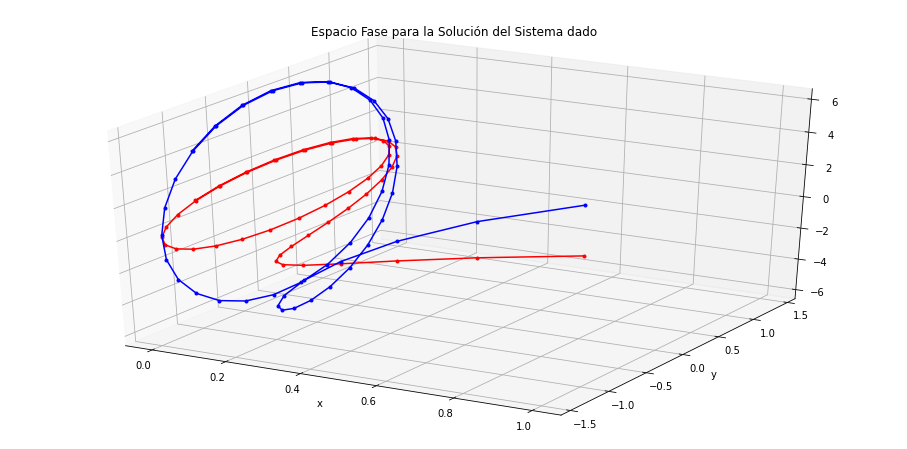

In [ ]:
print( "-------------------- Solución para el Sistema --------------------" )
print( " " )

t = np.linspace( 0, 2*np.pi, 51 )

cond0 = np.array( [ 1, 2, 3 ] )

c1 = 1
c2 = 1
c3 = 1
c4 = 3

def x( x0, t, c1, c2, c3 ):
  compx = x0[ 0 ]
  compy = x0[ 1 ]
  compz = x0[ 2 ]
    # print( x0 )
    # print( y0 )
    # print( z0 ) 

  x = c1 * compx * np.exp( -2*t )
  y = c2 * ( np.cos( 2*t ) + np.sin( 2*t ) )*( -compy/2 )
  z = c3 * ( np.cos( 2*t ) - np.sin( 2*t ) )*( compz/2 )

  sol = np.array( [ x, y, z ] )

  return sol

Solve1 = x( cond0, t, c1, c2, c3 ) # Primera solución
  # print( Solve )

xx1 = Solve1[ 0, : ]
  # print( xx )
xy1 = Solve1[ 1, : ]
  # print( xy )
xz1 = Solve1[ 2, : ]
  # print( xz )

Solve2 = x( cond0, t, c1, c2, c4 ) # Segunda Solución
  # print( Solve )

xx2 = Solve2[ 0, : ]
  # print( xx )
xy2 = Solve2[ 1, : ]
  # print( xy )
xz2 = Solve2[ 2, : ]
  # print( xz )


fig = plt.figure( figsize = ( 16, 8 )) # Creamos la figura
ax1 = fig.add_subplot( 111, projection = "3d" ) # Agrrgamos un plano 3D
plt.plot( xx1, xy1, xz1, "r.-", label = " $c3$ = 1 " )
plt.plot( xx2, xy2, xz2, "b.-", label = " $c3$ = 3 " )
plt.title( "Espacio Fase para la Solución del Sistema dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
# plt.zlabel( "z" )

# Mostramos el gráfico
plt.show()

# ***`Ejercicio 5:`***

*`Por favor grafique en el espacio fase una familia de soluciones y determine el tipo de punto crítico de cada uno de los siguientes sistemas de ecuaciones.`*


\begin{eqnarray*}
\frac{d x}{d t} & = & - x + z  \\
\frac{d y}{dt } & = &  3 y  \\
\frac{d z}{dt } & = &  - x - z \\
\end{eqnarray*}

*`Reescribimos el sistema de ecuaciones diferenciales de la siguiente manera:`*

\begin{eqnarray*}
  \frac{d x}{d t} & = & - 1(x) + 0(y) + 1(z)  \\
  \frac{d y}{dt } & = &   0(x) + 3(y) + 0(z)  \\
  \frac{d z}{dt } & = & - 1(x) + 0(y) - 1(z) \\
\end{eqnarray*}

*`Definimos al vector de variables de la siguiente manera:`*

\begin{equation*}
  \vec{x} = 
  \begin{bmatrix}
    x \\
    y \\
    z \\
  \end{bmatrix}
\end{equation*}

*`escribimos el sistema de ecuaciones diferenciales de forma vectorial/matricial:`*

\begin{equation}
  \frac{d}{dt} 
  \begin{bmatrix}
    x \\
    y \\
    z \\
  \end{bmatrix} = 
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    - 1(x) + 0(y) + 1(z) \\
    0(x) + 3(y) + 0(z) \\
    - 1(x) + 0(y) - 1(z)
  \end{bmatrix}
\end{equation}

*`Por lo tanto tenemos que:`*

\begin{equation}
  \frac{d\vec{x}}{dt} = 
  \begin{bmatrix}
    -1 & 0 & 1 \\
     0 & 3 & 0 \\
    -1 & 0 & -1 \\
  \end{bmatrix} *
  \begin{bmatrix}
    x \\
    y \\
    z \\
  \end{bmatrix}, A = 
  \begin{bmatrix}
    -1 & 0 & 1 \\
     0 & 3 & 0 \\
    -1 & 0 & -1 \\
  \end{bmatrix}
\end{equation}

In [ ]:
#======================= CALCULAMOS LOS VALORES DE LAMBDA ======================

print( "-------------------- Matriz A --------------------" )
print( " " )

A = np.array( [ [ -1, 0, 1 ], [ 0, 3, 0 ], [ -1, 0, -1 ] ] )
print( A, " = A " )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = ", q, " : Determinante de la Matriz" )
print( " " )

eigvals, eigvecs = la.eig( A )
print( eigvals, " : Eigenvalores " )
print( " " )
print( eigvecs, " : Eigenvectores " )
print( " " )

Λ = np.array( [ [ complex( -1, 1 ), 0, 0 ], 
                [ 0, complex( -1, -1 ), 0 ], 
                [ 0, 0, 3 ] ] )

print( Λ, " = Λ " )
print( " " )

prod = la.inv( eigvecs ) @ Λ @ eigvecs

print( prod )

-------------------- Matriz A --------------------
 
[[-1  0  1]
 [ 0  3  0]
 [-1  0 -1]]  = A 
 
Tr(A) =  1  : Traza de la Matriz
 
det(A) =  6.0  : Determinante de la Matriz
 
[-1.+1.j -1.-1.j  3.+0.j]  : Eigenvalores 
 
[[0.70710678+0.j         0.70710678-0.j         0.        +0.j        ]
 [0.        +0.j         0.        -0.j         1.        +0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j 0.        +0.j        ]]  : Eigenvectores 
 
[[-1.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.-1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  3.+0.j]]  = Λ 
 
[[ 1.+0.5j -2.+0.5j  0.+0.j ]
 [-2.+0.5j  1.+0.5j  0.+0.j ]
 [ 0.+0.j   0.+0.j  -1.-1.j ]]


In [ ]:
print( "-------------------- Según una calculadora externa --------------------" )

eigvals = np.array( [ 3, complex( -1, 1 ), complex( -1, -1 ) ] )
print( " Eigenvalores : ", eigvals )
print( " " )

Λ = np.array( [ [ 3, 0, 0 ], 
                [ 0, complex( -1, 1 ), 0 ], 
                [ 0, 0, complex( -1, -1 ) ] ] )

print( Λ, " = Λ " )
print( " " )

eig1 = np.array( [ [ 0 ], [ 1 ], [ 0 ] ] )
eig2 = np.array( [ [ complex( 0, -1 ) ], [ 0 ], [ 1 ] ] )
eig3 = np.array( [ [ complex( 0, 1 ) ], [ 0 ], [ 1 ] ] )
print( eig1, " = v1 " )
print( " " )
print( eig2, " = v2 " )
print( " " )
print( eig3, " = v3 " )
print( " " )

eigvec = np.array( [ [ 0, complex( 0, -1 ), complex( 0, 1 ) ],  
                     [ 1, 0, 0 ], 
                     [ 0, 1, 1 ] ] )

print( eigvec, " = P " )
print( " " )

print( la.inv( eigvec ), " = P^-1 " )
print( " " )

prod = eigvec @ Λ @ la.inv( eigvec ) 

print( prod, " = A " )

-------------------- Según una calculadora externa --------------------
 Eigenvalores :  [ 3.+0.j -1.+1.j -1.-1.j]
 
[[ 3.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+1.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.-1.j]]  = Λ 
 
[[0]
 [1]
 [0]]  = v1 
 
[[0.-1.j]
 [0.+0.j]
 [1.+0.j]]  = v2 
 
[[0.+1.j]
 [0.+0.j]
 [1.+0.j]]  = v3 
 
[[0.+0.j 0.-1.j 0.+1.j]
 [1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.+0.j]]  = P 
 
[[ 0. -0.j   1. -0.j  -0. -0.j ]
 [ 0. +0.5j  0. +0.j   0.5-0.j ]
 [ 0. -0.5j  0. +0.j   0.5-0.j ]]  = P^-1 
 
[[-1.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  3.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j -1.+0.j]]  = A 


*`La solución del sistema es:`*

\begin{equation}
  \vec{x}(t) = \left[ c_1(\cos(t)+i\sin(t))v_1 + c_2(\cos(t)-i\sin(t))v_2 \right][ e^{-t} ] + c_3e^{3t}v_3
\end{equation}

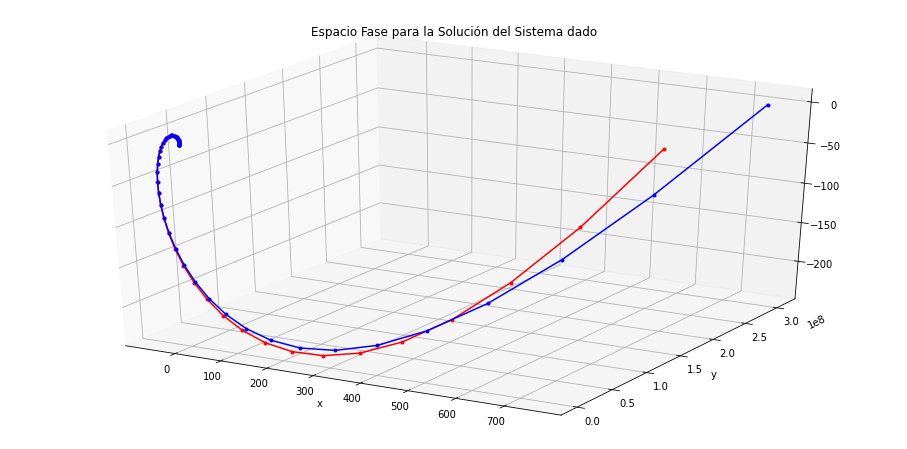

In [ ]:
t = np.linspace( 0, 2*np.pi, 51 )

c1 = 1
c2 = 1
c3 = 1
c4 = 2

v1 = np.array( [ [ np.sqrt( 2 )/2 ], [ 0 ], [   np.sqrt( 2 )/2 ] ] )
v2 = np.array( [ [ np.sqrt( 2 )/2 ], [ 0 ], [ - np.sqrt( 2 )/2 ] ] )
v3 = np.array( [ [ 0 ], [ 1 ], [ 0 ] ] )

def x( t, c1, c2, c3, v1, v2, v3 ):
  w1 = c1 * ( np.cos( t ) + np.sin( t ) ) * v1
  w2 = c2 * ( np.cos( t ) - np.sin( t ) ) * v2
  k = np.exp( t )
  w3 = c3 * np.exp( 3*t ) * v3

  sol = ( w1 + w2 ) * k + w3

  return sol

Solve1 = x( t, c1, c2, c3, v1, v2, v3 )
  # print( Solve )

xx1 = Solve1[ 0, : ]
  # print( xx )
xy1 = Solve1[ 1, : ]
  # print( xx )
xz1 = Solve1[ 2, : ]
  # print( xx )

Solve2 = x( t, c1, c2, c4, v1, v2, v3 )
  # print( Solve )

xx2 = Solve2[ 0, : ]
  # print( xx )
xy2 = Solve2[ 1, : ]
  # print( xx )
xz2 = Solve2[ 2, : ]
  # print( xx )

fig = plt.figure( figsize = ( 16, 8 )) # Creamos la figura
ax1 = fig.add_subplot( 111, projection = "3d" ) # Agrrgamos un plano 3D
plt.plot( xx1, xy1, xz1, "r.-", label = " $c3$ = 1 " )
plt.plot( xx2, xy2, xz2, "b.-", label = " $c3$ = 3 " )
plt.title( "Espacio Fase para la Solución del Sistema dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
# plt.zlabel( "z" )

# Mostramos el gráfico
plt.show()

# ***`Ejercicio 6:`***

*`Resuelva el siguientes problemas de valor inicial.`*

\begin{eqnarray*}
\frac{d x}{d t} & = & - x  \\
\frac{d y}{dt } & = &  x + 2 y  \\
x(0) = 0, & & y(0) = 3
\end{eqnarray*}

In [ ]:
print( "-------------------- Valores de la Matrz: --------------------" ) 
print( " " )

A = np.array( [ [ -1, 0 ], [ 1, 2 ] ] )
print( A, " = A" )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = p = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = q = ", q, " : Determinante de la Matriz" )
print( " " )

print( "-------------------- Las Raíces son: --------------------" )
print( " " )

# p( λ ) = λ^2 - pλ + q # Polinomio característico de det( A - λI )

dis = p**2 - 4*q

if ( dis < 0 ):

  absdis = abs ( dis ) # Convertimos en valor absoluta para que sea calculable

  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  

  print( " λ1 = ", λ1, "i" ) # Raíces Imaginarias
  print( " λ2 = ", λ2, "i" )

else:

  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 

  print( " λ1 = ", λ1 ) # Raíces Reales
  print( " λ2 = ", λ2 )
  print( " " )

eigvals, eigvecs = la.eig( A )

print( eigvecs, " : Eigenvectores " )
# print( eigvals ) 

-------------------- Valores de la Matrz: --------------------
 
[[-1  0]
 [ 1  2]]  = A
 
Tr(A) = p =  1  : Traza de la Matriz
 
det(A) = q =  -2.0  : Determinante de la Matriz
 
-------------------- Las Raíces son: --------------------
 
 λ1 =  2.0
 λ2 =  -1.0
 
[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]  : Eigenvectores 


In [ ]:
print( "-------------------- Según una calculadora externa --------------------" )

eigvals = np.array( [ 2, -1 ] ) 
print( eigvals, " : Eigenvalores " )
print( " " )

v1 = np.array( [ [ 0 ], 
                 [ 1 ] ] )
print( v1, " = v1 " )
print( " " )

v2 = np.array( [ [ -3 ], 
                 [ 1 ] ] )
print( v2, " = v2 " )
print( " " )

eigvecs = np.array( [ [ 0, -3 ],
                      [ 1, 1 ] ] )
print( eigvecs, " : Eigenvectores " )
print( " " )

Λ = np.array( [ [ 2, 0 ], 
                [ 0, -1 ] ] )

print( Λ, " = Λ " )
print( " " )

print( eigvecs, " = P " )
print( " " )

print( la.inv( eigvecs ), " = P^-1 " )
print( " " )

prod = eigvecs @ Λ @ la.inv( eigvecs )

print( prod )

-------------------- Según una calculadora externa --------------------
[ 2 -1]  : Eigenvalores 
 
[[0]
 [1]]  = v1 
 
[[-3]
 [ 1]]  = v2 
 
[[ 0 -3]
 [ 1  1]]  : Eigenvectores 
 
[[ 2  0]
 [ 0 -1]]  = Λ 
 
[[ 0 -3]
 [ 1  1]]  = P 
 
[[ 0.33333333  1.        ]
 [-0.33333333  0.        ]]  = P^-1 
 
[[-1.  0.]
 [ 1.  2.]]


\begin{equation}
  \vec{x}(t) = \vec{x_0} \exp(At)
\end{equation}

\begin{equation}
  A=P \Lambda P^{-1}
\end{equation}

\begin{equation}
  \vec{x}(t) = \vec{x_0} \exp(P \Lambda P^{-1}t)
\end{equation}

\begin{equation}
  \vec{x}(t) = \vec{x_0} P \exp( \Lambda t) P^{-1}
\end{equation}

\begin{equation}
  \vec{x}(t) = \vec{x_0}
  \begin{bmatrix}
    0 & -3 \\
    1 & 1 \\
  \end{bmatrix}
  \exp \left( 
    \begin{bmatrix}
      2 & 0 \\
      0 & -1
    \end{bmatrix}
  t \right)
  \begin{bmatrix}
    \frac{1}{3} & 1  \\
    -\frac{1}{3} & 0
  \end{bmatrix}
\end{equation}

\begin{equation}
  \vec{x}(t) = \vec{x_0}
  \begin{bmatrix}
    0 & -3 \\
    1 & 1 \\
  \end{bmatrix}
  \begin{bmatrix}
    e^{et} & 0 \\
    0 & e^{-t}
  \end{bmatrix}
  \begin{bmatrix}
    \frac{1}{3} & 1  \\
    -\frac{1}{3} & 0
  \end{bmatrix}
\end{equation}

\begin{equation}
  \vec{x}(t) = \vec{x_0}
  \begin{bmatrix}
    0 & -3e^{-t} \\
    e^{2t} & e^{-t}
  \end{bmatrix}
  \begin{bmatrix}
    \frac{1}{3} & 1  \\
    -\frac{1}{3} & 0
  \end{bmatrix}
\end{equation}

\begin{equation}
  \vec{x}(t) = \vec{x_0}
  \begin{bmatrix}
    e^{-t} & 0 \\
    \frac{1}{3}e^{2t} - \frac{1}{3}e^{-t} & e^{2t}
  \end{bmatrix}
\end{equation}

\begin{equation}
  \vec{x}(t) = 
  \begin{bmatrix}
    x_0 & y_0
  \end{bmatrix}
  \begin{bmatrix}
    e^{-t} & 0 \\
    \frac{1}{3}e^{2t} - \frac{1}{3}e^{-t} & e^{2t}
  \end{bmatrix}
\end{equation}

\begin{equation}
  \vec{x}(t) = \left( 
    x_0 e^{-t} + \frac{y_0}{3}( e^{2t}-e^{-t}), y_0e^{2t}
  \right)
\end{equation}

\begin{bmatrix}
  x(0) = 0 & y(0) = 3
\end{bmatrix}

\begin{equation}
  \vec{x}(t) = \left( 
    \frac{3}{3}( e^{2t}-e^{-t}), 3e^{2t}
  \right)
\end{equation}

\begin{equation}
  \vec{x}(t) = \left( 
    e^{2t}-e^{-t}, 3e^{2t}
  \right)
\end{equation}

---------- Solución del Sistema de Ecuaciones ----------
 


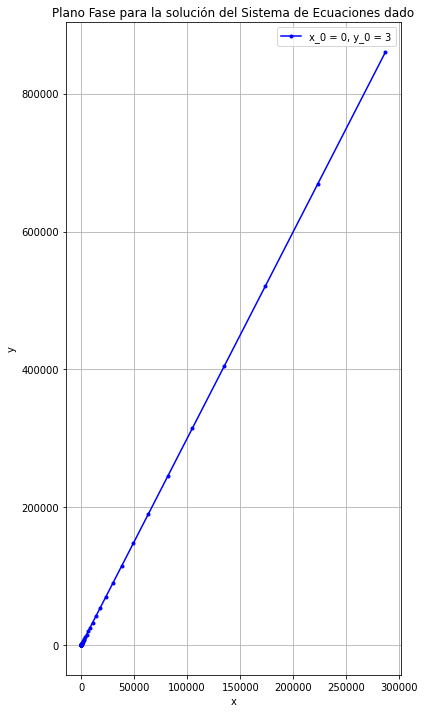

In [ ]:
print( "---------- Solución del Sistema de Ecuaciones ----------" )
print( " " )

t = np.linspace( 0, 2*np.pi, 51 )

def x( t ):
  w1 = np.exp( 2*t ) - np.exp( -t )
  w2 = 3 * np.exp( 2*t )

  sol = np. array( [ w1, w2 ] )

  return sol

Solve = x( t )
  # print( Solve )

xx = Solve[ 0, : ]
  # print( xx )
xy = Solve[ 1, : ]
  # print( xy )

plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx, xy, "b.-", label = "x_0 = 0, y_0 = 3"  )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del Sistema de Ecuaciones dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
 
plt.grid()
plt.show()

# ***`Ejercicio 7:`***

*`Resuelva el siguientes problemas de valor inicial.`*

\begin{eqnarray*}
\frac{d x}{d t} & = & 2 x + y  \\
\frac{d y}{dt } & = &  x +  y  \\
x(1) = 1, & & y(1) = 1
\end{eqnarray*}

In [ ]:
print( "-------------------- Valores de la Matrz: --------------------" ) 
print( " " )

A = np.array( [ [ 2, 1 ], [ 1, 1 ] ] )
print( A, " = A" )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = p = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = q = ", q, " : Determinante de la Matriz" )
print( " " )

print( "-------------------- Las Raíces son: --------------------" )
print( " " )

# p( λ ) = λ^2 - pλ + q # Polinomio característico de det( A - λI )

dis = p**2 - 4*q

if ( dis < 0 ):

  absdis = abs ( dis ) # Convertimos en valor absoluta para que sea calculable

  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  

  print( " λ1 = ", λ1, "i" ) # Raíces Imaginarias
  print( " λ2 = ", λ2, "i" )

else:

  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 

  print( " λ1 = ", λ1 ) # Raíces Reales
  print( " λ2 = ", λ2 )
  print( " " )

eigvals, eigvecs = la.eig( A )

print( eigvecs, " : Eigenvectores " )
# print( eigvals ) 

-------------------- Valores de la Matrz: --------------------
 
[[2 1]
 [1 1]]  = A
 
Tr(A) = p =  3  : Traza de la Matriz
 
det(A) = q =  1.0  : Determinante de la Matriz
 
-------------------- Las Raíces son: --------------------
 
 λ1 =  2.618033988749895
 λ2 =  0.3819660112501051
 
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]  : Eigenvectores 


In [ ]:
print( "-------------------- Según una calculadora externa --------------------" )

eigvals = np.array( [ ( 3 + np.sqrt(5) )/2, ( 3 - np.sqrt(5) )/2 ] ) 
print( eigvals, " : Eigenvalores " )
print( " " )

v1 = np.array( [ [ 1 + np.sqrt( 5 ) ], 
                 [ 2 ] ] )
print( v1, " = v1 " )
print( " " )

v2 = np.array( [ [ 1 - np.sqrt( 5 ) ], 
                 [ 2 ] ] )
print( v2, " = v2 " )
print( " " )

eigvecs = np.array( [ [ 1 + np.sqrt( 5 ), 1 - np.sqrt( 5 ) ],
                      [ 2, 2 ] ] )
print( eigvecs, " : Eigenvectores " )
print( " " )

Λ = np.array( [ [ ( 3 + np.sqrt(5) )/2, 0 ], 
                [ 0, ( 3 - np.sqrt(5) )/2 ] ] )

print( Λ, " = Λ " )
print( " " )

print( eigvecs, " = P " )
print( " " )

print( la.inv( eigvecs ), " = P^-1 " )
print( " " )

prod = eigvecs @ Λ @ la.inv( eigvecs )

print( prod )

-------------------- Según una calculadora externa --------------------
[2.61803399 0.38196601]  : Eigenvalores 
 
[[3.23606798]
 [2.        ]]  = v1 
 
[[-1.23606798]
 [ 2.        ]]  = v2 
 
[[ 3.23606798 -1.23606798]
 [ 2.          2.        ]]  : Eigenvectores 
 
[[2.61803399 0.        ]
 [0.         0.38196601]]  = Λ 
 
[[ 3.23606798 -1.23606798]
 [ 2.          2.        ]]  = P 
 
[[ 0.2236068  0.1381966]
 [-0.2236068  0.3618034]]  = P^-1 
 
[[2. 1.]
 [1. 1.]]


*`Saltandonos los cálculos obtenemos que la solución del sistema de ecuaciones diferenciales es:`*

\begin{equation}
  \vec{x_0}(t)=\left( \frac{1+\sqrt{5}}{2\sqrt{5}} e^{ \frac{3+\sqrt{5}}{2}t}, \frac{1+\sqrt{5}}{2\sqrt{5}} e^{ \frac{3-\sqrt{5}}{2}t} \right)
\end{equation}

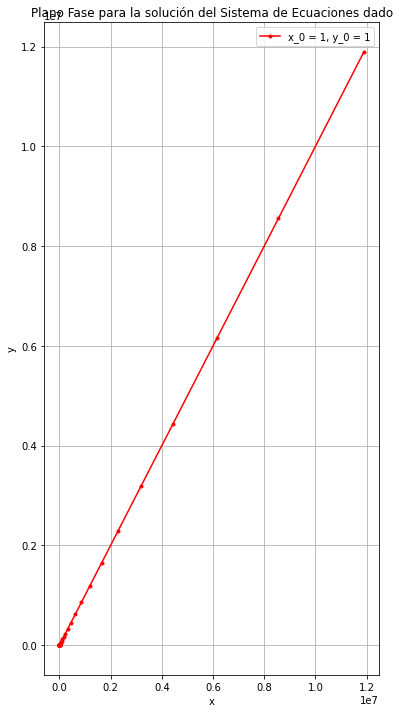

In [ ]:
t = np.linspace( 0, 2*np.pi, 51 )

def x(t):
  fac = ( 1 + np.sqrt( 2 ) )/( 2*np.sqrt( 2 ) ) # Factor común de la solución

  f_e1 = ( 3 + np.sqrt( 5 ) )/( 2 ) # Factor Exponente 1
  f_e2 = ( 3 - np.sqrt( 5 ) )/( 2 ) # Factor Exponente 2

  w1 = fac * np.exp( f_e1 * t ) # Primera Coordenada
  w2 = fac * np.exp( f_e2 * t ) # Segunda Coordenada

  sol = np.array( [ w1, w1 ] )

  return sol

Solve = x(t)

xx = Solve[ 0, : ]
  # print( xx )
xy = Solve[ 1, : ]
  # print( xy )

plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx, xy, "r.-", label = "x_0 = 1, y_0 = 1"  )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del Sistema de Ecuaciones dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
 
plt.grid()
plt.show()

# ***`Ejercicio 8:`***

*`Resuelva el siguientes problemas de valor inicial.`*

\begin{eqnarray*}
\frac{d x}{d t} & = & A x  \\
x(0) & = & (0,3) \\
A & = & \begin{bmatrix}
0 & 3 \\
1 & -2 \\
\end{bmatrix}
\end{eqnarray*}

In [ ]:
print( "-------------------- Valores de la Matrz: --------------------" ) 
print( " " )

A = np.array( [ [ 0, 3 ], [ 1, -2 ] ] )
print( A, " = A" )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = p = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = q = ", q, " : Determinante de la Matriz" )
print( " " )

print( "-------------------- Las Raíces son: --------------------" )
print( " " )

# p( λ ) = λ^2 - pλ + q # Polinomio característico de det( A - λI )

dis = p**2 - 4*q

if ( dis < 0 ):

  absdis = abs ( dis ) # Convertimos en valor absoluta para que sea calculable

  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  

  print( " λ1 = ", λ1, "i" ) # Raíces Imaginarias
  print( " λ2 = ", λ2, "i" )

else:

  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 

  print( " λ1 = ", λ1 ) # Raíces Reales
  print( " λ2 = ", λ2 )
  print( " " )

eigvals, eigvecs = la.eig( A )

print( eigvecs, " : Eigenvectores " )
# print( eigvals ) 

-------------------- Valores de la Matrz: --------------------
 
[[ 0  3]
 [ 1 -2]]  = A
 
Tr(A) = p =  -2  : Traza de la Matriz
 
det(A) = q =  -3.0  : Determinante de la Matriz
 
-------------------- Las Raíces son: --------------------
 
 λ1 =  1.0
 λ2 =  -3.0
 
[[ 0.9486833  -0.70710678]
 [ 0.31622777  0.70710678]]  : Eigenvectores 


In [ ]:
print( "-------------------- Según una calculadora externa --------------------" )

eigvals = np.array( [ 1, -3 ] ) 
print( eigvals, " : Eigenvalores " )
print( " " )

v1 = np.array( [ [ 3 ], 
                 [ 1 ] ] )
print( v1, " = v1 " )
print( " " )

v2 = np.array( [ [ -1 ], 
                 [ 1 ] ] )
print( v2, " = v2 " )
print( " " )

eigvecs = np.array( [ [ 3, -1 ],
                      [ 1, 1 ] ] )
print( eigvecs, " : Eigenvectores " )
print( " " )

Λ = np.array( [ [ 1, 0 ], 
                [ 0, -3 ] ] )

print( Λ, " = Λ " )
print( " " )

print( eigvecs, " = P " )
print( " " )

print( la.inv( eigvecs ), " = P^-1 " )
print( " " )

prod = eigvecs @ Λ @ la.inv( eigvecs )

print( prod )

-------------------- Según una calculadora externa --------------------
[ 1 -3]  : Eigenvalores 
 
[[3]
 [1]]  = v1 
 
[[-1]
 [ 1]]  = v2 
 
[[ 3 -1]
 [ 1  1]]  : Eigenvectores 
 
[[ 1  0]
 [ 0 -3]]  = Λ 
 
[[ 3 -1]
 [ 1  1]]  = P 
 
[[ 0.25  0.25]
 [-0.25  0.75]]  = P^-1 
 
[[ 0.  3.]
 [ 1. -2.]]


*`Saltandonos los cálculos obtenemos que la solución del sistema de ecuaciones diferenciales es:`*

\begin{equation}
  \vec{x_0}(t)=\left( \frac{3}{4}x_0 e^{t}, \frac{3}{4}y_0 e^{-3t} \right)
\end{equation}

*`pero ya que`* $x_0$ *`es igual a 0, tenemos que la solución es:`*

\begin{equation}
  \vec{x_0}(t)=\left( 0, \frac{3}{4}y_0 e^{-3t} \right)
\end{equation}

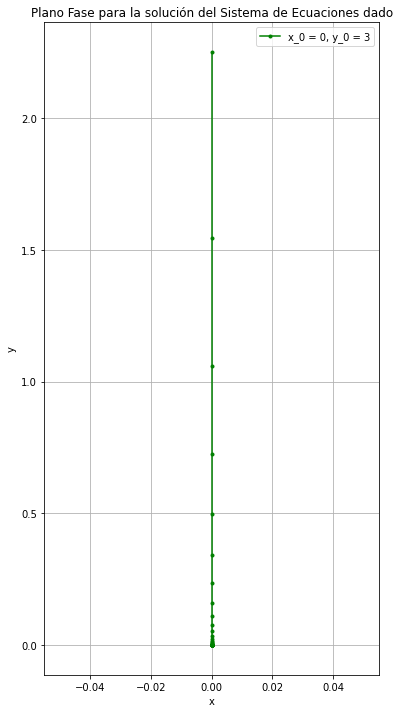

In [ ]:
t = np.linspace( 0, 2*np.pi, 51 )

def x(t):
  x_0 = np.array( [ 0, 3 ] )
  x = x_0[ 0 ]
  y = x_0[ 1 ]

  w1 = ( 3/4 )*x*np.exp( t )
  w2 = ( 3/4 )*y*np.exp( -3*t )

  sol = np.array( [ w1, w2 ] )

  return sol

Solve = x(t)

xx = Solve[ 0, : ]
  # print( xx )
xy = Solve[ 1, : ]
  # print( xy )

plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx, xy, "g.-", label = "x_0 = 0, y_0 = 3"  )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del Sistema de Ecuaciones dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
 
plt.grid()
plt.show()

*`En cualquier caso se introdujeron las condiciones inciales y la solución sin desarollar, y vemos que cumple con lo antes dicho`*

# ***`Ejercicio 9:`***

*`Resuelva el siguientes problemas de valor inicial.`*

\begin{eqnarray*}
\frac{d x}{d t} & = & A x  \\
x(0) & = & (0,-b,b) \\
A & = & \begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}
\end{eqnarray*}

In [ ]:
#======================= CALCULAMOS LOS VALORES DE LAMBDA ======================

print( "-------------------- Matriz A --------------------" )
print( " " )

A = np.array( [ [ 2, 0, 0 ], [ 0, -1, 0 ], [ 0, 2, -3 ] ] )
print( A, " = A " )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = ", p, " : Traza de la Matriz" )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = ", q, " : Determinante de la Matriz" )
print( " " )

eigvals, eigvecs = la.eig( A )
print( eigvals, " : Eigenvalores " )
print( " " )
print( eigvecs, " : Eigenvectores " )
print( " " )

Λ = np.array( [ [ 2, 0, 0 ], 
                [ 0, -3, 0 ], 
                [ 0, 0, -1 ] ] )

print( Λ, " = Λ " )
print( " " )

prod = la.inv( eigvecs ) @ Λ @ eigvecs

print( prod )

-------------------- Matriz A --------------------
 
[[ 2  0  0]
 [ 0 -1  0]
 [ 0  2 -3]]  = A 
 
Tr(A) =  -2  : Traza de la Matriz
 
det(A) =  6.0  : Determinante de la Matriz
 
[ 2.+0.j -3.+0.j -1.+0.j]  : Eigenvalores 
 
[[1.         0.         0.        ]
 [0.         0.         0.70710678]
 [0.         1.         0.70710678]]  : Eigenvectores 
 
[[ 2  0  0]
 [ 0 -3  0]
 [ 0  0 -1]]  = Λ 
 
[[ 2.          0.          0.        ]
 [ 0.         -1.          1.41421356]
 [ 0.          0.         -3.        ]]


In [ ]:
print( "-------------------- Según una calculadora externa --------------------" )
print( " " )

eigvals = np.array( [ -1, 2, -3 ] )
print( " Eigenvalores : ", eigvals )
print( " " )

Λ = np.array( [ [ -1, 0, 0 ], 
                [ 0, 2, 0 ], 
                [ 0, 0, -3 ] ] )

print( Λ, " = Λ " )
print( " " )

eig1 = np.array( [ [ 0 ], [ 1 ], [ 1 ] ] )
eig2 = np.array( [ [ 1 ], [ 0 ], [ 0 ] ] )
eig3 = np.array( [ [ 0 ], [ 0 ], [ 1 ] ] )
print( eig1, " = v1 " )
print( " " )
print( eig2, " = v2 " )
print( " " )
print( eig3, " = v3 " )
print( " " )

eigvec = np.array( [ [ 0, 1, 0 ],  
                     [ 1, 0, 0 ], 
                     [ 1, 0, 1 ] ] )

print( eigvec, " = P " )
print( " " )

print( la.inv( eigvec ), " = P^-1 " )
print( " " )

prod = eigvec @ Λ @ la.inv( eigvec ) 

print( prod, " = A " )

-------------------- Según una calculadora externa --------------------
 
 Eigenvalores :  [-1  2 -3]
 
[[-1  0  0]
 [ 0  2  0]
 [ 0  0 -3]]  = Λ 
 
[[0]
 [1]
 [1]]  = v1 
 
[[1]
 [0]
 [0]]  = v2 
 
[[0]
 [0]
 [1]]  = v3 
 
[[0 1 0]
 [1 0 0]
 [1 0 1]]  = P 
 
[[-0.  1. -0.]
 [ 1.  0. -0.]
 [ 0. -1.  1.]]  = P^-1 
 
[[ 2.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  2. -3.]]  = A 


*`Saltándonos los cálculos obtenemos que la solución del sistema de ecuaciones es:`*

\begin{equation}
  \vec{x}(t)=( 0, 0, be^{-3t} )
\end{equation}

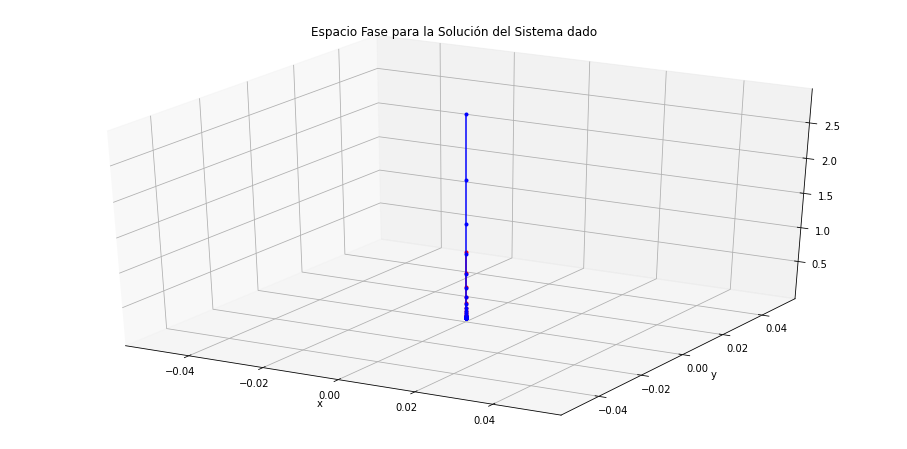

In [ ]:
t = np.linspace( 0.01, 2*np.pi, 51 )

b1 = 1
b2 = 3

def x( t, b ):
  w1 = 0*np.exp( -t )
  w2 = 0*np.exp( 2*t )
  w3 = b*np.exp( -3*t ) 

  sol = np.array( [ w1, w2, w3 ] )

  return sol

Solve1 = x( t, b1 )
  # print( Solve )

xx1 = Solve1[ 0, : ]
  # print( xx )
xy1 = Solve1[ 1, : ]
  # print( xx )
xz1 = Solve1[ 2, : ]
  # print( xx )

Solve2 = x( t, b2 )
  # print( Solve )

xx2 = Solve2[ 0, : ]
  # print( xx )
xy2 = Solve2[ 1, : ]
  # print( xx )
xz2 = Solve2[ 2, : ]
  # print( xx )

fig = plt.figure( figsize = ( 16, 8 )) # Creamos la figura
ax1 = fig.add_subplot( 111, projection = "3d" ) # Agrrgamos un plano 3D
plt.plot( xx1, xy1, xz1, "r.-", label = " $c3$ = 1 " )
plt.plot( xx2, xy2, xz2, "b.-", label = " $c3$ = 3 " )
plt.title( "Espacio Fase para la Solución del Sistema dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
# plt.zlabel( "z" )

# Mostramos el gráfico
plt.show()


# ***`Ejercicio 10:`***

*`Se tiene el siguiente sistema de resortes acoplados con dos masas.  `*

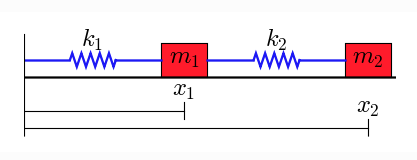


*`El sistema esta sujeto del primer resorte de la izquierda. Cuando el sistema se deja en reposo, las longitudes de los resortes son`* $L_1$ y $L_2$.

*`Las ecuaciones de movimiento estan dadas por las siguientes ecuaciones diferenciales acopladas:`*

\begin{eqnarray*}
m_1 x_1^{''} + b_1 x_1^{'}+k_1 (x_1-L_1)-k_2(x_2-x_1-L_2) & = & 0 \\
m_2 x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-L_2) & = & 0 \\
\end{eqnarray*}

*`Encuentre las soluciones como funciones de $t$ y grafíquelas, así como las trayectorias en el espacio fase.`*

*`Suponga que`* $L_1=L_2=1$ *`y que las masas son iguales`* $m_1=m_2=1$.  

***`10.1)`*** *`Encuentre los eigenvalores del sistema y diga como son las soluciones.`*  

***`10.2)`*** *`Caso sin fricción.`* $b_1=b_2=0$, $k_1=6$, $k_2=4$*`, condiciones iniciales`* $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,4,0)$ 

***`10.3)`*** *`Igual que el caso anterior pero, con fricción:`* $b_1=0.1, b_2=0.2$

# ***`10.1)`*** *`Encuentre los eigenvalores del sistema y diga como son las soluciones.`* 

*`El problema nos presenta dos ecuaciones diferenciales de segundo orden. Definiendo las siguientes ecuaciones podemos escribir las primeras dos como ecuaciones de primer orde:`*

\begin{equation}
  x_{1} = x_{1} \\
  x_{2} = x_{2} \\
  x_{3} = \frac{dx_{1}}{dt} \\
  x_{4} = \frac{dx_{2}}{dt} \\
\end{equation}

*`De esta forma podemos reescribir las ecuaciones originales de la siguiente forma:`*

\begin{equation}
  \frac{dx_{1}}{dt} = x_{3} \\
  \frac{dx_{3}}{dt} = \frac{k_{2}(x_{2}-x_{1}-L_{2})-k_{1}(x_{1}-L_{1})-b_{1}x_{3}}{m_{1}} \\
  \frac{dx_{2}}{dt} = x_{4} \\
  \frac{dx_{4}}{dt} = \frac{-k_{2}(x_{2}-x_{1}-L_{2})-b_{2}x_{4}}{m_{2}}
\end{equation}

*`Si desarrollamos las fracciones de la segunda y cuarta expresión tenemos que:`*

\begin{equation}
  \frac{dx_{1}}{dt} = x_{3} \\
  \frac{dx_{3}}{dt} = \frac{k_{2}x_{2}}{m_{1}} - \frac{k_{2}x_{1}}{m_{1}} - \frac{k_{2}L_{2}}{m_{1}} - \frac{k_{1}x_{1}}{m_{1}} + \frac{k_{1}L_{1}}{m_{1}} - \frac{b_{1}x_{3}}{m_{1}} \\
  \frac{dx_{2}}{dt} = x_{4} \\
  \frac{dx_{4}}{dt} = - \frac{k_{2}x_{2}}{m_{2}} + \frac{k_{2}x_{1}}{m_{2}} + \frac{k_{2}L_{2}}{m_{2}} - \frac{b_{2}x_{4}}{m_{2}}
\end{equation}

*`Si reorganizamos y reescribimos las ecuaciones tenemos que:`*

\begin{equation}
  \frac{dx_{1}}{dt} = 0 + x_{3} + 0 + 0 + 0 + 0 \\
  \frac{dx_{3}}{dt} = - \frac{k_{2}+k_{1}}{m_{1}} x_{1} - \frac{b_{1}x_{3}}{m_{1}} + \frac{k_{2}x_{2}}{m_{1}} + 0 + \frac{k_{1}L_{1}}{m_{1}} - \frac{k_{2}L_{2}}{m_{1}} \\
  \frac{dx_{2}}{dt} = 0 + 0 + 0 + x_{4} + 0 + 0 \\
  \frac{dx_{4}}{dt} = \frac{k_{2}x_{1}}{m_{2}} + 0 - \frac{k_{2}x_{2}}{m_{2}} - \frac{b_{2}x_{4}}{m_{2}} + 0 + \frac{k_{2}L_{2}}{m_{2}}
\end{equation}

*`Si definimos al vector de variables de la siguiente manera tenemos que:`*

\begin{equation}
  \vec{x} = \left [ \begin{matrix} 
    x_{1} \\
    x_{3} \\
    x_{2} \\
    x_{4} \\
  \end{matrix} \right ]
\end{equation}

*`En consecuencia tenemos que las derivadas pueden ser reescritas cómo:`*

\begin{equation}
  \frac{d\vec{x}}{dt} = \frac{d}{dt}
  \left [ \begin{matrix} 
    x_{1} \\
    x_{3} \\
    x_{2} \\
    x_{4} \\
  \end{matrix} \right ]
\end{equation}

*`Por lo tanto podemos definir la matriz de las ecuaciones de la siguiente manera:`*

\begin{equation}
  \frac{d\vec{x}}{dt} = \left[
    \begin{matrix}
      0 + x_{3} + 0 + 0\\
      - \frac{k_{2}+k_{1}}{m_{1}} x_{1} - \frac{b_{1}x_{3}}{m_{1}} + \frac{k_{2}x_{2}}{m_{1}} + 0 \\
      0 + 0 + 0 + x_{4} \\
      \frac{k_{2}x_{1}}{m_{2}} + 0 - \frac{k_{2}x_{2}}{m_{2}} - \frac{b_{2}x_{4}}{m_{2}} \\
    \end{matrix}
  \right]
  +
  \left[
    \begin{matrix}
      0\\
      \frac{k_{1}L_{1}}{m_{1}} - \frac{k_{2}L_{2}}{m_{1}} \\
      0 \\
      0 + \frac{k_{2}L_{2}}{m_{2}}
    \end{matrix}
  \right]
\end{equation}

\begin{equation}
  \frac{d\vec{x}}{dt} = \left[
    \begin{matrix}
      0 & 1 & 0 & 0 \\
      - \frac{k_{2}+k_{1}}{m_{1}} & - \frac{b_{1}}{m_{1}} & \frac{k_{2}}{m_{1}} & 0 \\
      0 & 0 & 0 & 1 \\
      \frac{k_{2}}{m_{2}} & 0 & - \frac{k_{2}}{m_{2}} & - \frac{b_{2}}{m_{2}}
    \end{matrix}
  \right]*\left [ \begin{matrix} 
    x_{1} \\
    x_{3} \\
    x_{2} \\
    x_{4} \\
  \end{matrix} \right ]
  +
  \left[
    \begin{matrix}
      0\\
      \frac{k_{1}L_{1}-k_{2}L_{2}}{m_{1}} \\
      0 \\
      \frac{k_{2}L_{2}}{m_{2}}
    \end{matrix}
  \right]
\end{equation}

\begin{equation}
  A = \left[
    \begin{matrix}
      0 & 1 & 0 & 0 \\
      - \frac{k_{2}+k_{1}}{m_{1}} & - \frac{b_{1}}{m_{1}} & \frac{k_{2}}{m_{1}} & 0 \\
      0 & 0 & 0 & 1 \\
      \frac{k_{2}}{m_{2}} & 0 & - \frac{k_{2}}{m_{2}} & - \frac{b_{2}}{m_{2}}
    \end{matrix}
  \right]
\end{equation}

In [9]:
#========================== EIGENVALORES DE LA MATRIZ ==========================

b1 = 0.5 # Condición Electa
k1 = 6
m1 = 1

b2 = 0.5 # Condición Electa
k2 = 4
m2 = 1

A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 )/m1, -b1/m1, k2/m1, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2/m2, 0, -k2/m2, -b2/m2 ] ] )

print( "b1 = ", b1, " (Condición electa) " )
print( "k1 = ", k1 )
print( "m1 = ", m1 )
print( " " )

print( "b2 = ", b2, " (Condición electa) " )
print( "k2 = ", k2 )
print( "m2 = ", m2 )
print( " " )

print( A, " = A " )

eigvals, eigvecs = la.eig( A )
print( eigvals, " : Eigenvalores " )
print( " " )
print( eigvecs, " : Eigenvectores " )
print( " " )

b1 =  0.5  (Condición electa) 
k1 =  6
m1 =  1
 
b2 =  0.5  (Condición electa) 
k2 =  4
m2 =  1
 
[[  0.    1.    0.    0. ]
 [-10.   -0.5   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.   -0.5]]  = A 
[-0.25+3.45506874j -0.25-3.45506874j -0.25+1.39194109j -0.25-1.39194109j]  : Eigenvalores 
 
[[-0.01790287-2.47422612e-01j -0.01790287+2.47422612e-01j
  -0.04564355-2.54132511e-01j -0.04564355+2.54132511e-01j]
 [ 0.85933785+0.00000000e+00j  0.85933785-0.00000000e+00j
   0.36514837+6.93889390e-17j  0.36514837-6.93889390e-17j]
 [ 0.00895144+1.23711306e-01j  0.00895144-1.23711306e-01j
  -0.09128709-5.08265023e-01j -0.09128709+5.08265023e-01j]
 [-0.42966892-8.32667268e-17j -0.42966892+8.32667268e-17j
   0.73029674+0.00000000e+00j  0.73029674-0.00000000e+00j]]  : Eigenvectores 
 


*`En el caso particular planteado en esta parte, vemos que la parte real de los 4 eigenvalores es negativa, por lo que el punto crítico es estable.`*

.

# ***`10.2)`*** *`Caso sin fricción.`* $b_1=b_2=0$, $k_1=6$, $k_2=4$*`, condiciones iniciales`* $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,4,0)$ 

\begin{equation}
  \frac{d\vec{x}}{dt} = \left[
    \begin{matrix}
      0 & 1 & 0 & 0 \\
      - \frac{k_{2}+k_{1}}{m_{1}} & - \frac{b_{1}}{m_{1}} & \frac{k_{2}}{m_{1}} & 0 \\
      0 & 0 & 0 & 1 \\
      \frac{k_{2}}{m_{2}} & 0 & - \frac{k_{2}}{m_{2}} & - \frac{b_{2}}{m_{2}}
    \end{matrix}
  \right]*\left [ \begin{matrix} 
    x_{1} \\
    x_{3} \\
    x_{2} \\
    x_{4} \\
  \end{matrix} \right ]
  +
  \left[
    \begin{matrix}
      0\\
      \frac{k_{1}L_{1}-k_{2}L_{2}}{m_{1}} \\
      0 \\
      \frac{k_{2}L_{2}}{m_{2}}
    \end{matrix}
  \right]
\end{equation}

\begin{equation}
  \frac{d\vec{x}}{dt} = \left[
    \begin{matrix}
      0 & 1 & 0 & 0 \\
      - \frac{4+6}{1} & - \frac{0}{1} & \frac{4}{1} & 0 \\
      0 & 0 & 0 & 1 \\
      \frac{4}{1} & 0 & - \frac{4}{1} & - \frac{0}{1}
    \end{matrix}
  \right]*\left [ \begin{matrix} 
    x_{1} \\
    x_{3} \\
    x_{2} \\
    x_{4} \\
  \end{matrix} \right ]
  +
  \left[
    \begin{matrix}
      0\\
      \frac{6(1)-4(1)}{1} \\
      0 \\
      \frac{4(1)}{1}
    \end{matrix}
  \right]
\end{equation}

\begin{equation}
  \frac{d\vec{x}}{dt} = \left[
    \begin{matrix}
      0 & 1 & 0 & 0 \\
      -10 & 0 & 4 & 0 \\
      0 & 0 & 0 & 1 \\
      4 & 0 & -4 & 0
    \end{matrix}
  \right]*\left [ \begin{matrix} 
    x_{1} \\
    x_{3} \\
    x_{2} \\
    x_{4} \\
  \end{matrix} \right ]
  +
  \left[
    \begin{matrix}
      0\\
      2 \\
      0 \\
      4
    \end{matrix}
  \right]
\end{equation}

In [55]:
#============================== RESOLUCIÓN DE 10.2 =============================

k1 = 6
b1 = 0

k2 = 4
b2 = 0

A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 ), -b1, k2, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2, 0, -k2,- b2 ] ] )

print( A, " = A " )
print( " " )

B = np.array( [ [ 0 ], 
                [ 2 ], 
                [ 0 ], 
                [ 4 ] ] )

def dXdt(X,t=0):
  return np.array( [ X[ 1 ], 
                     -( k2 + k1 )*X[ 0 ] - b1*X[ 1 ] + k2*X[ 2 ] ,  
                     X[ 3 ],   
                     -k2*X[ 2 ] + k2*X[ 0 ] ] )


Xf0 = np.array( [ 0.0, 0.0, 0.0, 0.0  ] ) # Puntos criticos del sistema 
                                          # Usando matriz aumentada de gauss
X0 = np.array( [ 1.0, 0.0, 4.0, 0.0 ] )   # Condiciones iniciales

print( "Puntos criticos del Sistema de Ecuaciones" )
print( "Xf0 = ", Xf0 ) 
print( " " )

# Verifiquemos que la derivada sí se haga 0 en los puntos criticos

  # all( dXdt( Xf0 ) == np.zeros( 4 ) ) and all( dXdt( Xf1 ) == np.zeros( 4 ) )
all( dXdt( Xf0 ) == np.zeros( 4 ) ) # and all( dXdt( Xf1 ) == np.zeros( 4 ) )
print( " " )

# Definimos el Jacobiano

def d2Xdt2( X, t = 0 ):
  return np.array( [ [ 0, 1, 0, 0 ], 
                     [ -( k2 + k1 ), -b1, k2, 0 ], 
                     [ 0, 0, 0, 1 ],
                     [ k2, 0, -k2, 0 ] ] )

# Jacobiano evaluado en el punto critico
Af1 = d2Xdt2( Xf0 )
print( "Jacobiano evaluado en punto critico" )
print( Af1 )
print( " " )

λ1, λ2, λ3, λ4 = la.eigvals( Af1 )
print( "Eigenvalores del Jacobiano en X" ) # Todos tienen parte real e imaginaria
print( "λ1 = ", λ1 )
print( "λ2 = ", λ2 )
print( "λ3 = ", λ3 )
print( "λ4 = ", λ4 )

[[  0   1   0   0]
 [-10   0   4   0]
 [  0   0   0   1]
 [  4   0  -4   0]]  = A 
 
Puntos criticos del Sistema de Ecuaciones
Xf0 =  [0. 0. 0. 0.]
 
 
Jacobiano evaluado en punto critico
[[  0   1   0   0]
 [-10   0   4   0]
 [  0   0   0   1]
 [  4   0  -4   0]]
 
Eigenvalores del Jacobiano en X
λ1 =  (2.220446049250313e-16+3.464101615137756j)
λ2 =  (2.220446049250313e-16-3.464101615137756j)
λ3 =  (-1.3877787807814457e-16+1.414213562373095j)
λ4 =  (-1.3877787807814457e-16-1.414213562373095j)


Periodo:  1.813799364234217
 
[[1.]
 [0.]
 [2.]
 [0.]]


<Figure size 432x288 with 0 Axes>

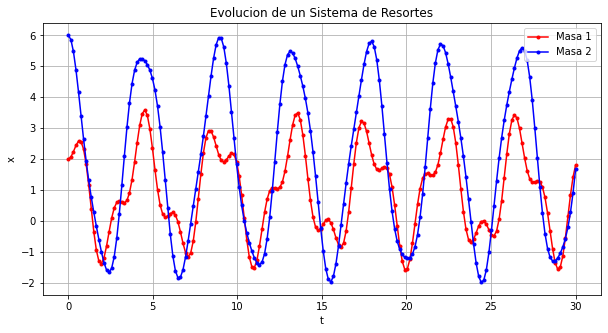

In [56]:
Tf1 = 2*np.pi/abs( λ1 ) 
print( "Periodo: ", Tf1 )
print( " " )
  # T_f2 = 2*np.pi/abs(lambda3) 
  # print('Periodo 2:', T_f1)

# Ahora busquemos la solucion

t = np.linspace( 0, 30, 200 )

X, infodict = odeint( dXdt, X0, t, full_output = True )
infodict[ "message" ]

B_sol = la.solve( A, -B )
print( B_sol )

x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( t, x1, "r.-", label = "Masa 1" );
plt.plot( t, x2, "b.-", label = "Masa 2" );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

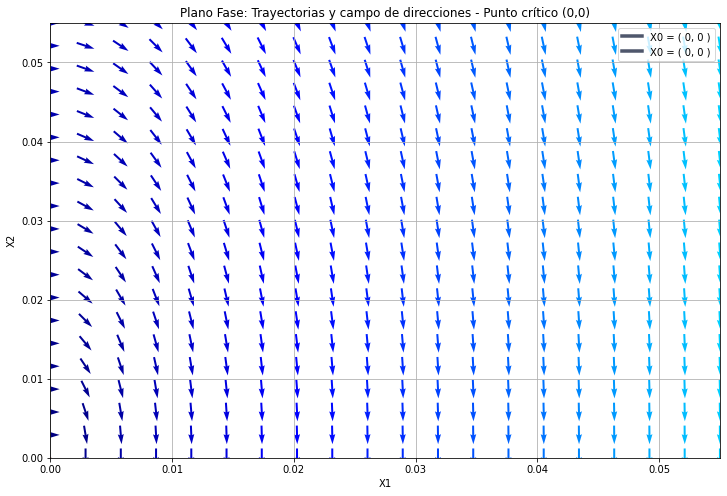

In [62]:
import numpy as np
from scipy import integrate, linalg
import pylab as plt
from matplotlib import cm

# Graficamos la familia de soluciones en el espacio fase para distintas condiciones iniciales

Vals = np.linspace( 1, 10, 1 ) # posición de X0 entre Xf0 y Xf1
Vcolors = plt.cm.cividis( np.linspace( 0.3, 1., len( Vals ) ) ) # colores para cada trayectoria
 
plt.figure( figsize = ( 12, 8 ) ); 

#-------------------------------------------------------------------------------

# grafica las trayectorias

for V, col in zip( Vals, Vcolors ):
    X0 = V * Xf0 # punto inicial
    X = odeint( dXdt, X0, t ) # Integración para cada condición inicial
    plt.plot( X[ :, 0 ], X[ :, 2 ], lw = 3.5*V, Color = col,
             label = "X0 = ( %.f, %.f )" % ( X0[ 0 ], X0[ 2 ] ) )
    
ymax = plt.ylim( ymin = 0 )[ 1 ] # get axis limits
xmax = plt.xlim( xmin = 0 )[ 1 ]

for V, col in zip( Vals, Vcolors ):
    X0 = V * Xf0 # punto inicial
    X = odeint( dXdt, X0, t )         
    # Integración para cada condición inicial
    plt.plot( X[ :,1 ], X[ :,3 ], lw =3.5*V, Color=col,
             label = "X0 = ( %.f, %.f )" % ( X0[ 1 ], X0[ 3 ] ) )

#-------------------------------------------------------------------------------

# Define una malla y calcula la pendiente (dirección) en cada punto

y2max = plt.ylim( ymin = 0 )[ 1 ]   
x2max = plt.xlim( xmin = 0 )[ 1 ] 
nb_points = 20

x = np.linspace( 0, xmax, nb_points )
y = np.linspace( 0, ymax, nb_points )
x2 = np.linspace( 0, x2max, nb_points )
y2 = np.linspace( 0, y2max, nb_points )

X1 ,Y1 = np.meshgrid( x, y )     
X2 ,Y2 = np.meshgrid( x2, y2 )                    # crea la malla
DX1, DY1, DX2, DY2 = dXdt( [ X1, Y1, X2, Y2 ] ) 
  # dX_df es una funcion # calcula la tasa de crecimiento
  # De 4 componentes necesito la de x1 y x2


M = ( np.hypot( DX1, DY1 ) ) # distancia euclideana 
M[ M == 0 ] = 1.             # Evita divisiones entre 0 
DX1 /= M                     # Normaliza el tamaño de cada flecha
DY1 /= M

#-------------------------------------------------------------------------------

# Dibujar los campos de direcciones usando la función quiver de Matplotlib 
# EL color de las flechas indica la rapidez de crecimiento

plt.title( "Plano Fase: Trayectorias y campo de direcciones - Punto crítico (0,0)" )
Q = plt.quiver( X1, Y1, DX1, DY1, M, pivot = "mid", cmap=plt.cm.jet )
plt.xlabel( "X1" )
plt.ylabel( "X2" )
plt.legend( loc = "best" )
plt.grid()

plt.xlim( 0, xmax )
plt.ylim( 0, ymax )
plt.show()

.

# ***`10.3)`*** *`Igual que el caso anterior pero, con fricción:`* $b_1=0.1, b_2=0.2$

In [46]:
#============================== RESOLUCIÓN DE 10.3 =============================

k2=4
k1=6

b1=0.1
b2=0.2

A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 ), -b1, k2, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2, 0, -k2, -b2 ] ] )

print( A, " = A " )
print( " " )

B = np.array( [ [ 0 ],
                [ 2 ],
                [ 0 ],
                [ 4 ] ] )

def dXdt( X, t = 0 ):
  return np.array( [ X[ 1 ], -( k2 + k1 )*X[ 0 ] -b1*X[ 1 ] + k2*X[ 2 ],  
                   X[ 3 ], -k2*X[ 2 ] + k2*X[ 0 ] ] )
  
B_sol = la.solve( A, -B )
print( B_sol )


Xf0 = np.array( [ 0.0, 0.0, 0.0, 0.0 ] ) # Puntos criticos del sistema

# Usando matriz aumentada de gauss

X0 = np.array( [ 0.0, 0.0, 2.0, 0.0 ] ) # Condiciones iniciales
print( " " )
print( "Puntos criticos del Sistema de Ecuaciones" )
print( "Xf0 = ", Xf0 )
print( " " )

# all( dXdt( Xf0 ) == np.zeros( 4 ) ) and all( dXdt( Xf1 ) == np.zeros( 4 ) )
all( dXdt( Xf0 ) == np.zeros( 4 ) ) # and all( dXdt( Xf1 ) == np.zeros( 4 ) )

def d2Xdt2( X, t = 0 ):
  return np.array( [ [ 0, 1, 0, 0 ], 
                     [ -( k2 + k1 ), -b1, k2, 0 ], 
                     [ 0, 0, 0, 1],
                     [ k2, 0, -k2, 0 ] ] )
  
# Jacobiano evaluado en el punto critico
 
Af1 = d2Xdt2( Xf0 )
print( "Jacobiano evaluado en punto critico" )
print( Af1 )
print( " " )

λ1, λ2, λ3, λ4 = la.eigvals( Af1 )
print( "Eigenvalores del Jacobiano en X" ) # Todos tienen parte real e imaginaria
print( "λ1 = ", λ1 )
print( "λ2 = ", λ2 )
print( "λ3 = ", λ3 )
print( "λ4 = ", λ4 )

[[  0.    1.    0.    0. ]
 [-10.   -0.1   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.   -0.2]]  = A 
 
[[1.]
 [0.]
 [2.]
 [0.]]
 
Puntos criticos del Sistema de Ecuaciones
Xf0 =  [0. 0. 0. 0.]
 
Jacobiano evaluado en punto critico
[[  0.    1.    0.    0. ]
 [-10.   -0.1   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.    0. ]]
 
Eigenvalores del Jacobiano en X
λ1 =  (-0.03999936001028768+3.463593494852212j)
λ2 =  (-0.03999936001028768-3.463593494852212j)
λ3 =  (-0.010000639989712207+1.414291364612996j)
λ4 =  (-0.010000639989712207-1.414291364612996j)


Periodo:  1.8139444972104801
 
[[1.]
 [0.]
 [2.]
 [0.]]


<Figure size 432x288 with 0 Axes>

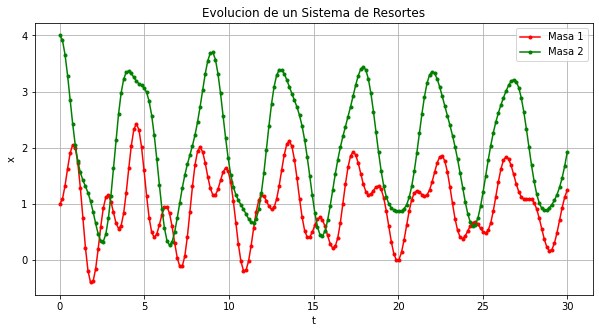

In [51]:
Tf1 = 2*np.pi/abs( λ1 ) 
print( "Periodo: ", Tf1 )
print( " " )
  # T_f2 = 2*np.pi/abs(lambda3) 
  # print('Periodo 2:', T_f1)

# Ahora busquemos la solucion

t = np.linspace( 0, 30, 200 )

X, infodict = odeint( dXdt, X0, t, full_output = True )
infodict[ "message" ]

B_sol = la.solve( A, -B )
print( B_sol )

x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( t, x1, "r.-", label = "Masa 1" );
plt.plot( t, x2, "g.-", label = "Masa 2" );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

<Figure size 432x288 with 0 Axes>

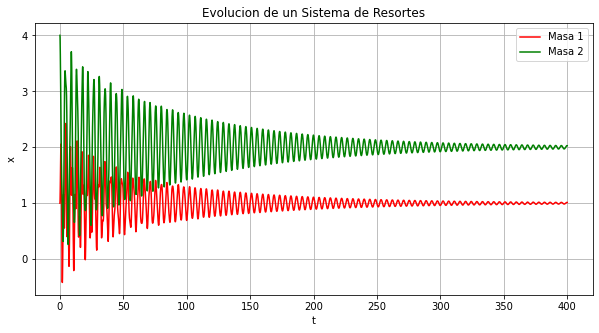

In [50]:
tr = np.linspace( 0, 400, 4000 )

X, infodict = integrate.odeint ( dXdt, X0, tr, full_output = True )
infodict[ "message" ]
x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( tr, x1, 'r-', label = "Masa 1" );
plt.plot( tr, x2, 'g-', label = "Masa 2" );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

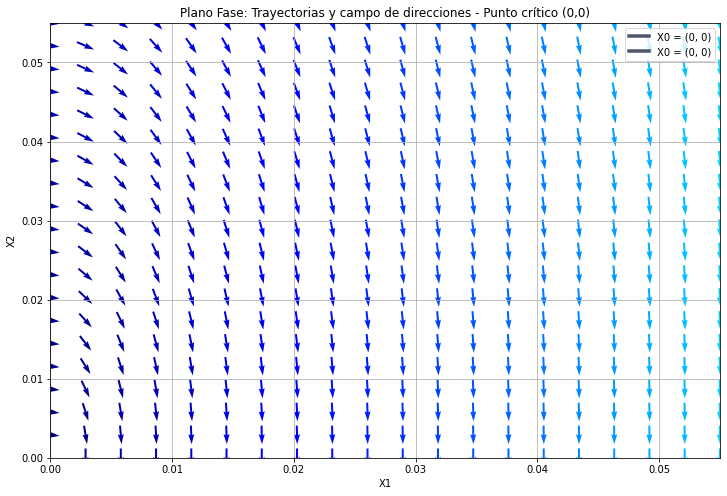

In [54]:
import numpy as np
from scipy import integrate, linalg
import pylab as plt
from matplotlib import cm

# Graficamos la familia de soluciones en el espacio fase para distintas condiciones iniciales

values  = np.linspace( 1, 10, 1 ) # posición de X0 entre X_f0 y X_f1
vcolors = plt.cm.cividis( np.linspace( 0.3, 1., len( values ) ) ) # colores para cada trayectoria
plt.figure(figsize=( 12, 8 ) ); 

#-------------------------------------------------------------------------------

# grafica las trayectorias

for v, col in zip( values, vcolors ):
    X0 = v * Xf0 # punto inicial
    X = integrate.odeint( dXdt, X0, t ) # Integración para cada condición inicial
    plt.plot( X[ :, 0 ], X[ :, 2 ], lw = 3.5*v, color = col,
             label = "X0 = (%.f, %.f)" % ( X0[ 0 ], X0[ 2 ] ) )
    
ymax = plt.ylim( ymin = 0 )[ 1 ] # get axis limits
xmax = plt.xlim( xmin = 0 )[ 1 ]

for v, col in zip( values, vcolors ):
    X0 = v * Xf0 # punto inicial
    X = integrate.odeint( dXdt, X0, t ) # Integración para cada condición inicial
    plt.plot( X[ :, 1 ], X[ :, 3 ], lw = 3.5*v, color = col,
             label = "X0 = (%.f, %.f)" % ( X0[ 1 ], X0[ 3 ]) )
    
#-------------------------------------------------------------------------------

# Define una malla y calcula la pendiente (dirección) en cada punto

y2max= plt.ylim( ymin = 0 )[ 1 ]   
x2max= plt.xlim( xmin = 0 )[ 1 ] 
nb_points = 20

x = np.linspace( 0, xmax, nb_points )
y = np.linspace( 0, ymax, nb_points )
x2 = np.linspace( 0, x2max, nb_points )
y2 = np.linspace( 0, y2max, nb_points )

X1 , Y1 = np.meshgrid( x, y )     
X2 , Y2 = np.meshgrid( x2, y2 )                # crea la malla
DX1, DY1, DX2, DY2 = dXdt( [ X1, Y1, X2, Y2 ]) 
# dX_df es una funcion                     # calcula la tasa de crecimiento
# De 4 componentes necesito la de x1 y x2

M = ( np.hypot( DX1, DY1 ) ) # distancia euclideana 
M[ M == 0] = 1.              # Evita divisiones entre 0 
DX1 /= M                     # Normaliza el tamaño de cada flecha
DY1 /= M

#-------------------------------------------------------------------------------

# Dibujar los campos de direcciones usando la función quiver de Matplotlib 
# EL color de las flechas indica la rapidez de crecimiento

plt.title( "Plano Fase: Trayectorias y campo de direcciones - Punto crítico (0,0)" )
Q = plt.quiver( X1, Y1, DX1, DY1, M, pivot="mid", cmap = plt.cm.jet )
plt.xlabel( "X1" )
plt.ylabel( "X2" )
plt.legend( loc = "best" )
plt.grid()

plt.xlim( 0, xmax )
plt.ylim( 0, ymax )
plt.show()